<a href="https://colab.research.google.com/github/harihraja/covid-charts/blob/master/Covid_Rt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid-Rt**
*   Read Data from https://rt.live
*   Calculate n-Day Average (Rolling Mean, SMA) of daily Mean R-value



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from google.colab import widgets
from google.colab import output


In [10]:
# Get data file from rt.live 
def get_datafile():
  file_name = 'https://d14wlfuexuxgcm.cloudfront.net/covid/rt.csv'
  df = pd.read_csv(file_name)
  return df

# calculate the n-Day Rolling Mean (Simple Moving Average)  
def rolling_mean(datafile, size, cols):
  grouper = datafile.groupby('region').rolling(window=size).mean()[cols]
  df_ML_SMA =  grouper.to_frame(name = 'rolling_mean').reset_index().drop('level_1', axis=1)
  df_ML_SMA['date'] = datafile['date']
  df_ML_SMA['mean'] = datafile['mean']
  return df_ML_SMA

# calculate the n-Day Rolling Mean (Simple Moving Average)  
# def rolling_mean(datafile, size, 'date', 'region', 'mean', 'rolling_mean'):
def rolling_mean2(datafile, size, series_col, groupby_col, value_col, result_col):
  grouper = datafile.groupby(groupby_col)[value_col].rolling(window=size, min_periods=1).mean()
  df_SMA =  grouper.to_frame(name = result_col).reset_index().drop('level_1', axis=1)
  df_SMA[series_col] = df[series_col]

  df_RM = datafile.merge(df_SMA, how='left', left_on=[groupby_col, series_col], right_on=[groupby_col, series_col])

  start_series = df_SMA[series_col].head(1).iloc[0]
  df_RM.loc[df_RM[series_col]==start_series, result_col] = None
  
  return df_RM

In [4]:
get_datafile()

,date,region,index,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests,new_tests,new_cases,new_deaths
0,2020-03-02,ME,0,1.361883,1.354452,1.177498,1.575387,54.320496,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN
1,2020-03-03,ME,1,1.354268,1.347312,1.153896,1.528188,0.530300,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN
2,2020-03-04,ME,2,1.347301,1.334438,1.141746,1.505498,7.518223,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN
3,2020-03-05,ME,3,1.340146,1.327099,1.146845,1.486514,14.262734,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN
4,2020-03-06,ME,4,1.331509,1.325569,1.167122,1.497586,15.336170,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,2020-07-24,HI,147,1.218297,1.208390,0.950787,1.463956,29.281066,22.942336,19.521583,55.0,2478.0,2478.0,55.0,1.0
7800,2020-07-25,HI,148,1.220140,1.202721,0.933831,1.449505,30.733592,23.785424,34.618164,59.0,1499.0,1499.0,59.0,0.0
7801,2020-07-26,HI,149,1.220646,1.203703,0.919463,1.455188,32.305709,24.685073,49.482615,71.0,1262.0,1262.0,71.0,0.0
7802,2020-07-27,HI,150,1.222929,1.209865,0.944886,1.485201,34.006144,25.644934,0.000000,0.0,0.0,63.0,63.0,0.0


# Plot Methods

*   Time Series for Most & Least 5 Viral States
*   Bar Chart for States (Virality, Alphabetical)



In [28]:
# Plot time series for the given states
def plot_timeseries_rollingmean(datafile, states, title):
  plt.figure(figsize=[10,8])
  plt.grid(True)


  for state in states:
    df_ML_SMA_state = datafile[datafile['region']==state]
    dates = pd.to_datetime(df_ML_SMA_state['date'])
    plt.plot(dates, df_ML_SMA_state['rolling_mean'], label=state)

  # plt.ylim(bottom=0.6, top=1.6)
  plt.xlabel('date')
  # plt.ylabel('R-value (Rolling Mean)')
  plt.ylabel('New Cases (Rolling Mean)')
  plt.title(title)
  plt.legend(loc=1)

# Plot bar chart for states (sorted & alphabetical)
def plot_bars_rollingmean(datafile, title):
  states = datafile['region']
  plt.figure(figsize=[30,8])
  plt.grid(True)
  
  xpos = np.arange(len(states))
  plt.xticks(xpos, states)
  # plt.bar(xpos, datafile['ML_SMA'])
  x = xpos
  y = datafile['rolling_mean']

  low = y <= 0.8
  high = y > 1.0
  middle = (y > low) | (y <= high)

  plt.bar(x[low], y[low], color = 'green')
  plt.bar(x[middle], y[middle], color = 'orange')
  plt.bar(x[high], y[high], color = 'red')

  z = np.linspace(0.9, 0.9, len(y))
  plt.plot(x, z, color='black', linestyle=':')
  z = np.linspace(1.0, 1.0, len(y))
  plt.plot(x, z, color='black', linestyle='--')
  z = np.linspace(1.1, 1.1, len(y))
  plt.plot(x, z, color='black', linestyle=':')

  plt.xlabel('regions')
  plt.ylabel('R-value (Rolling Mean)')
  plt.title(title)
  plt.legend(loc=1)


# Run: Read, Calculate & Plot

In [6]:
df = get_datafile() # acquire the data

states = df['region'].unique() # unique regions/states
date = df['date'].tail(1).iloc[0] # current date

GROUP_SIZE = 5 # For Most & Least Viral Groups

#### Bar Chart for States (Virality, Alphabetical)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


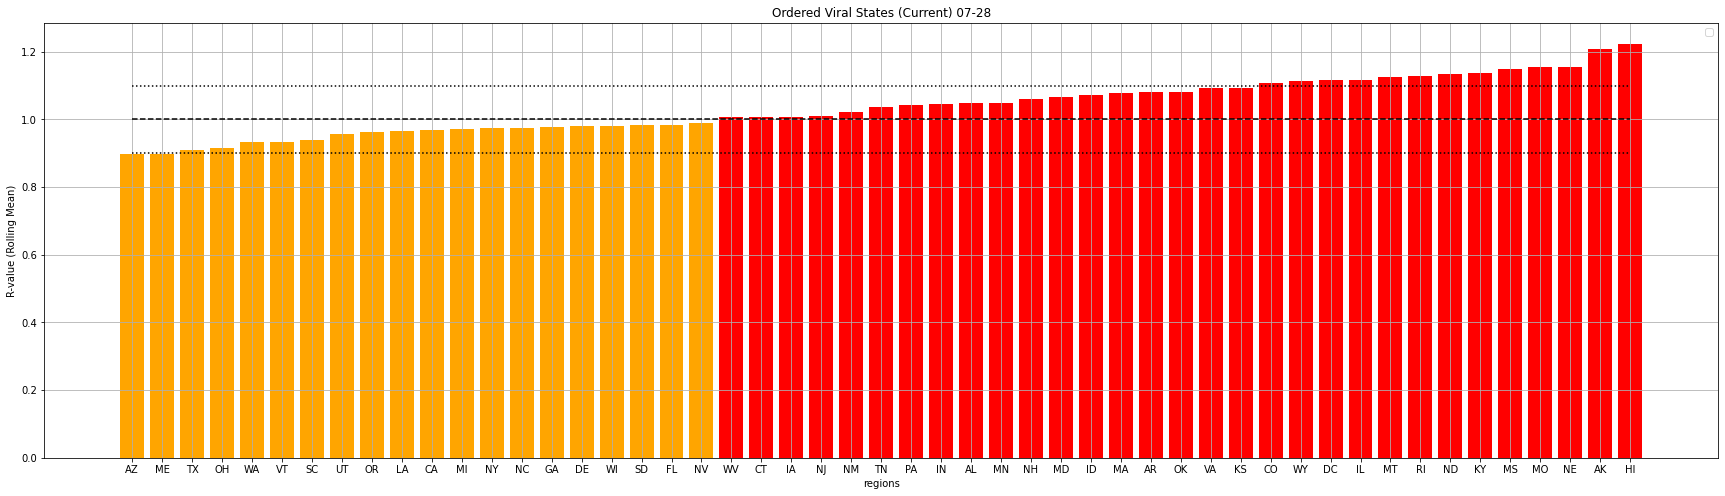

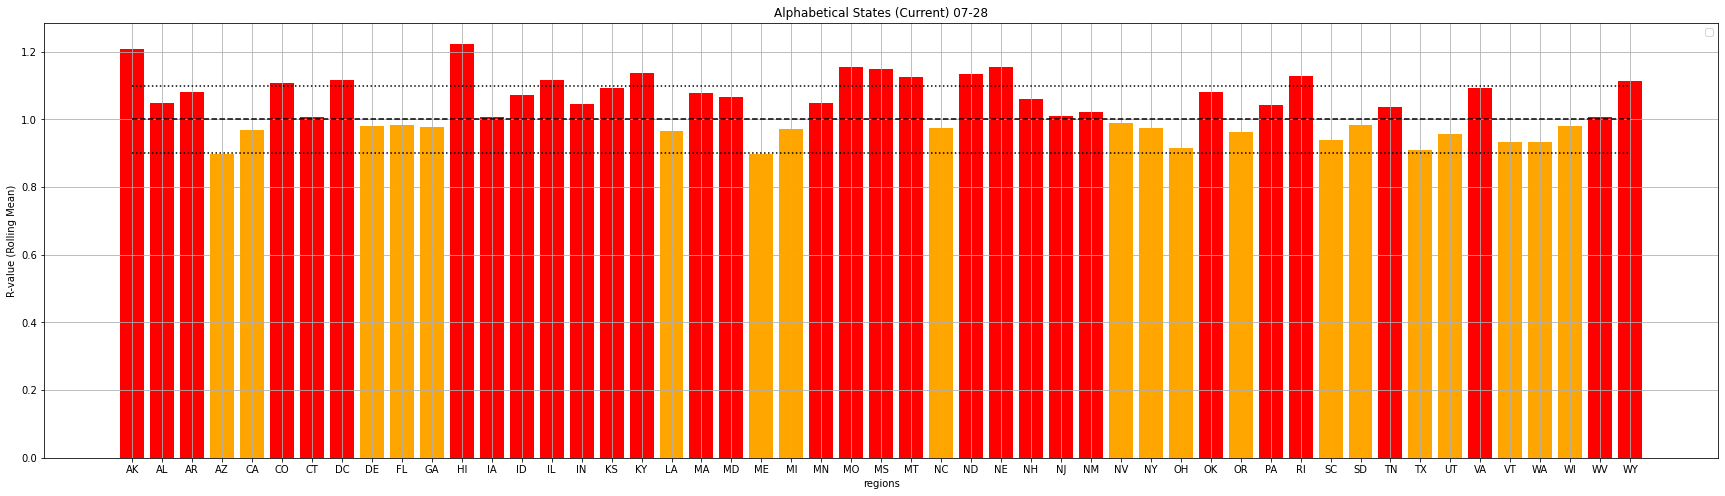

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


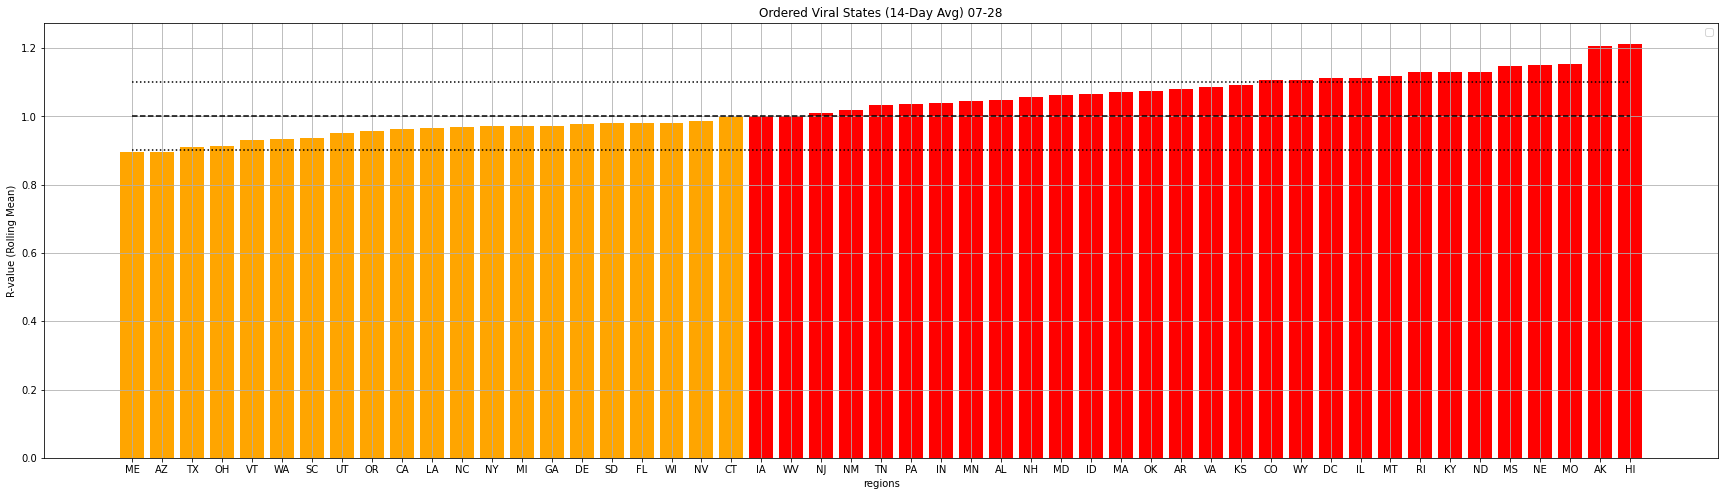

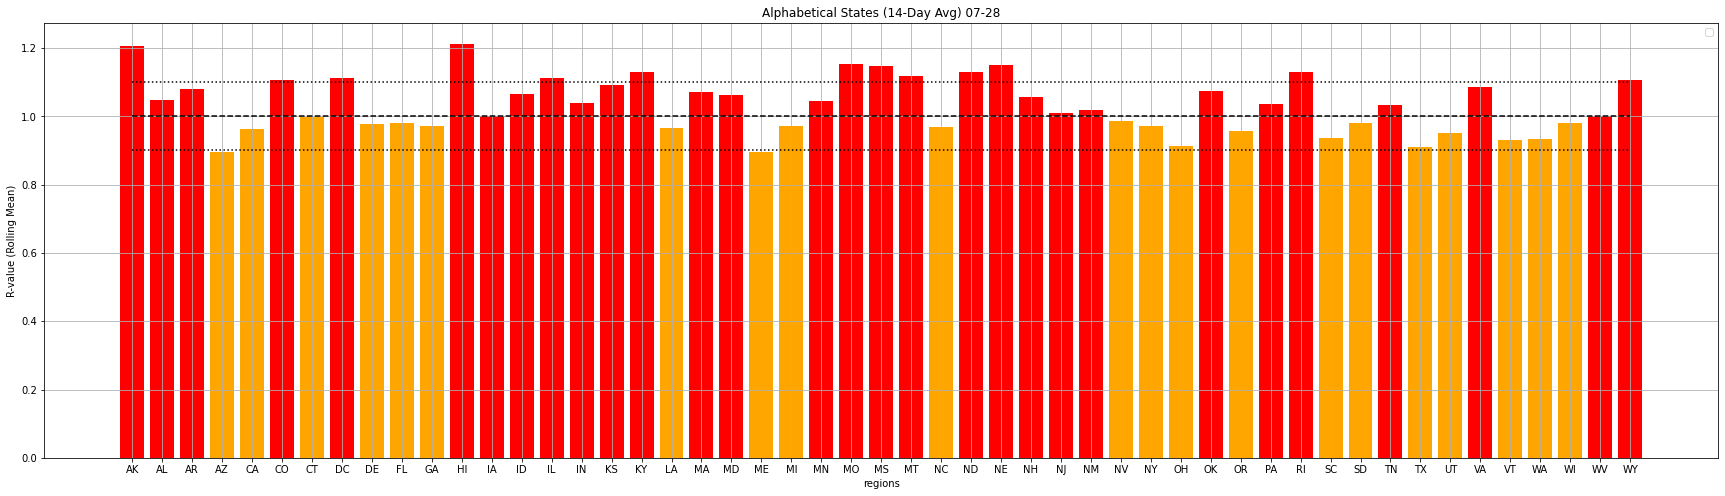

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


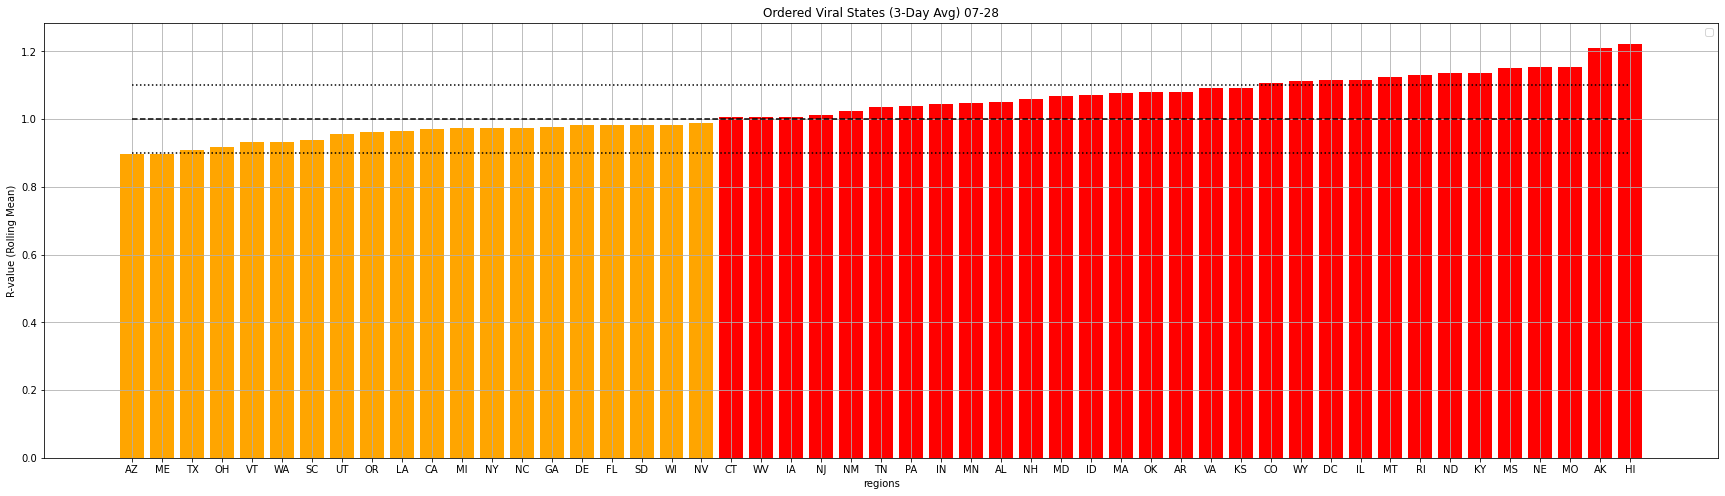

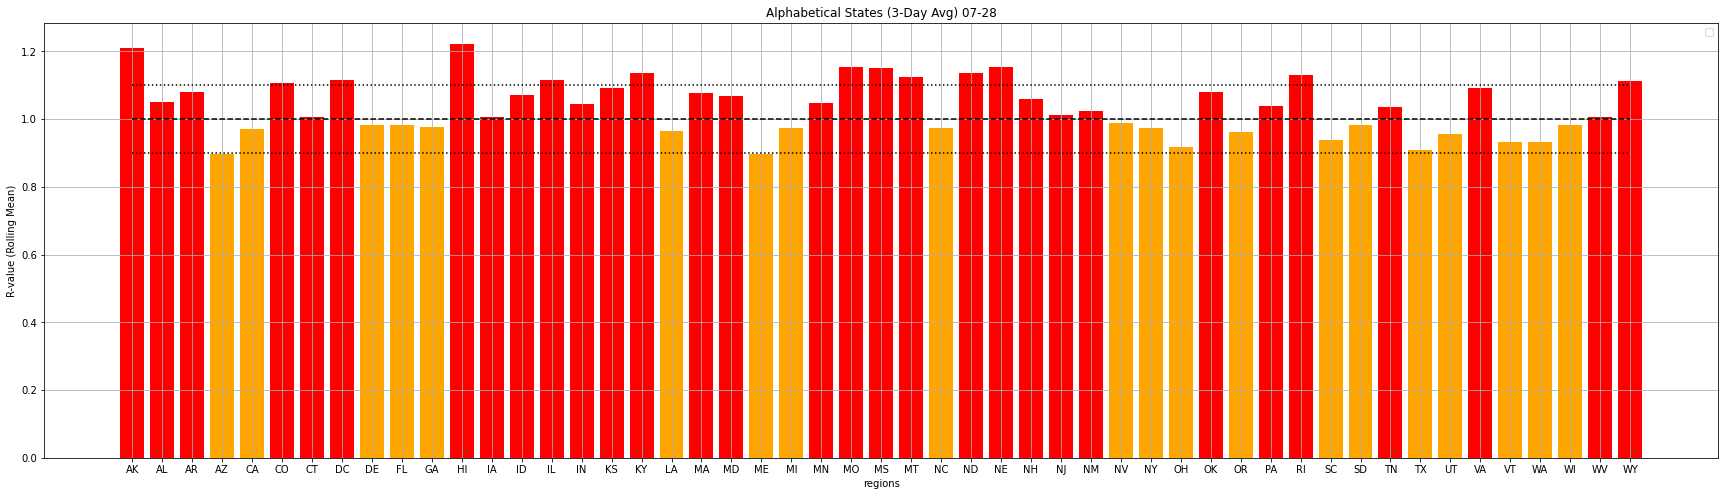

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


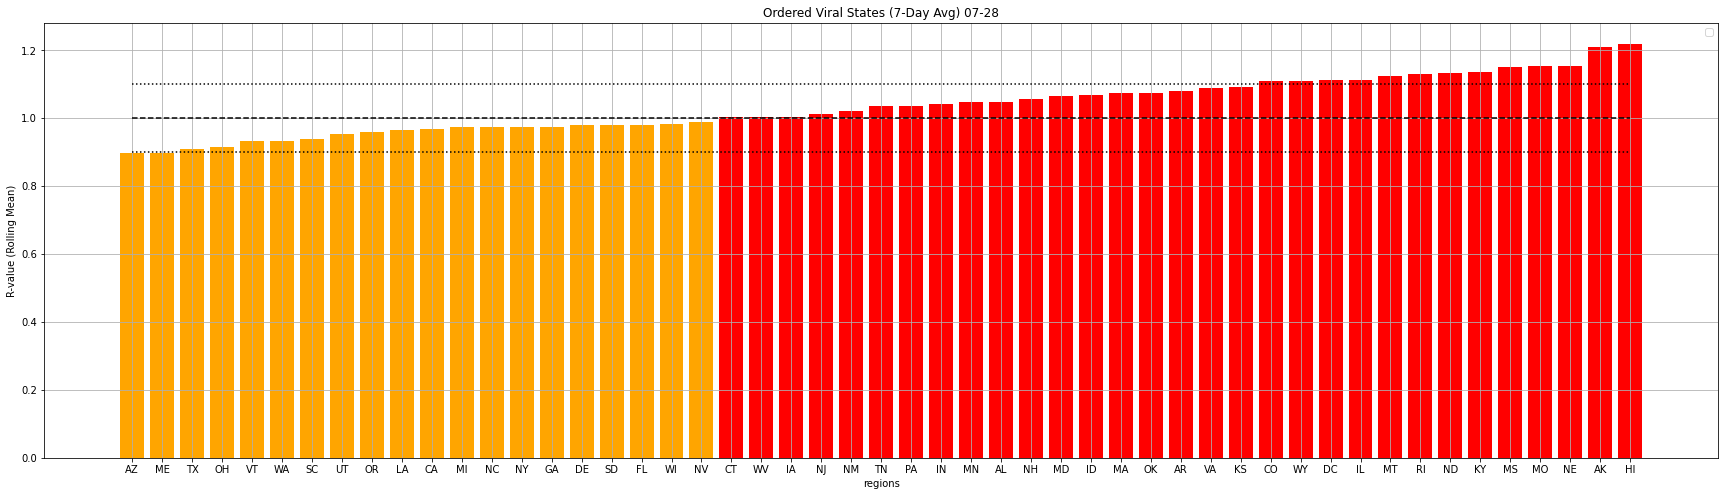

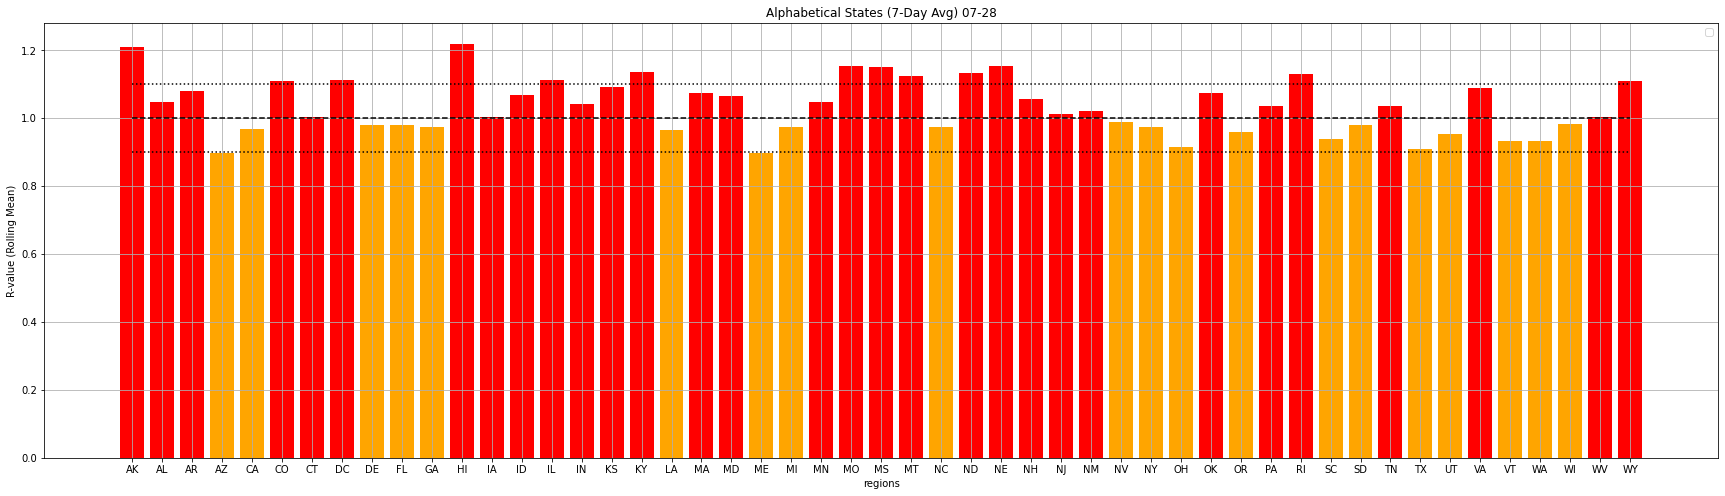

<IPython.core.display.Javascript object>

In [22]:
# Show Bar Chart (Sorted & Alphabetical) that plots 
# 14,7,3-Day Average along with Current in separate Tabs 
DAY_TABS = { 1: 'Current', 14: '14-Day Avg', 3: '3-Day Avg', 7: '7-Day Avg' }
tb = widgets.TabBar(list(DAY_TABS.values()), location='bottom')

for days in DAY_TABS.keys():
  with tb.output_to(DAY_TABS[days]):

    # df_ML_SMA = rolling_mean2(df, days, 'date', 'region', 'mean', 'rolling_mean')
    df_ML_SMA = rolling_mean(df, days, 'mean')

    df_ML_SMA_current = df_ML_SMA.groupby('region').tail(1)
    sorted_df_ML_SMA = df_ML_SMA_current.sort_values(by=['rolling_mean'])
    
    plot_bars_rollingmean(sorted_df_ML_SMA, 'Ordered Viral States (' + DAY_TABS[days] + ') ' + date[-5:])
    plot_bars_rollingmean(df_ML_SMA_current, 'Alphabetical States (' + DAY_TABS[days] + ') ' + date[-5:])


#### Time Series for Most & Least 5 Viral States

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,,


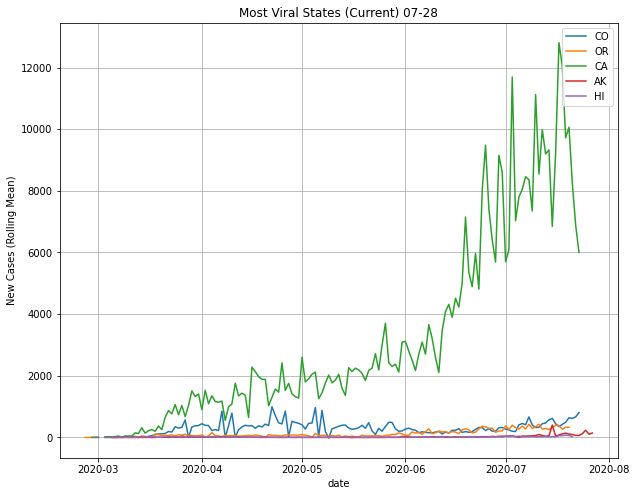

<IPython.core.display.Javascript object>

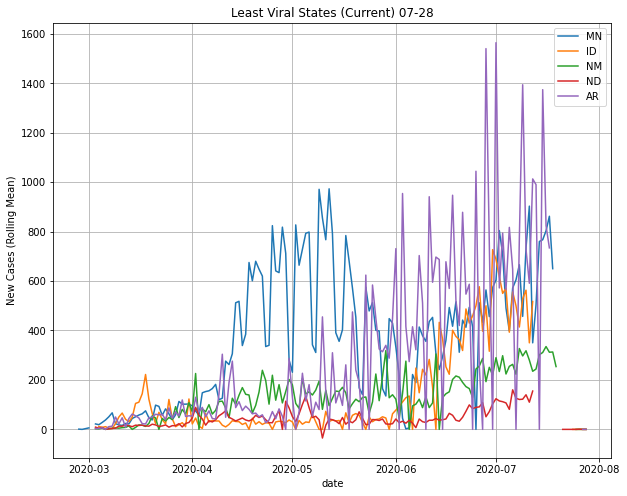

<IPython.core.display.Javascript object>

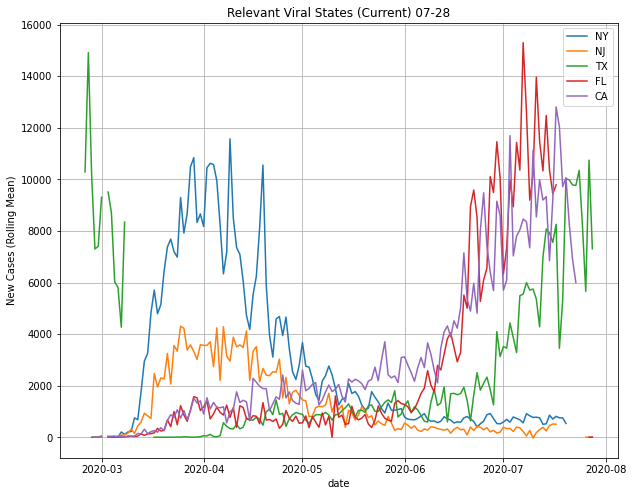

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,,


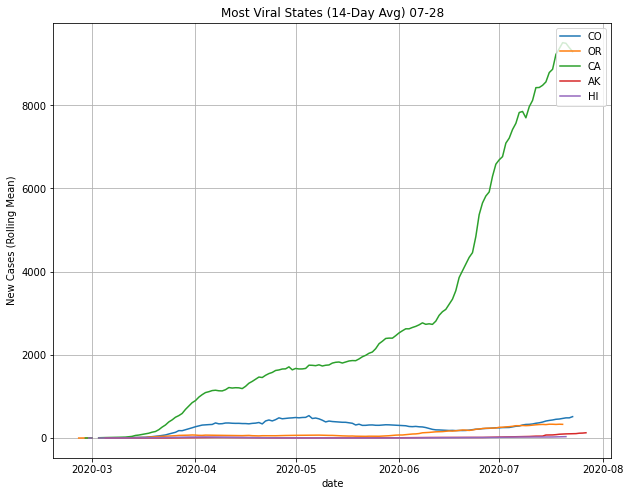

<IPython.core.display.Javascript object>

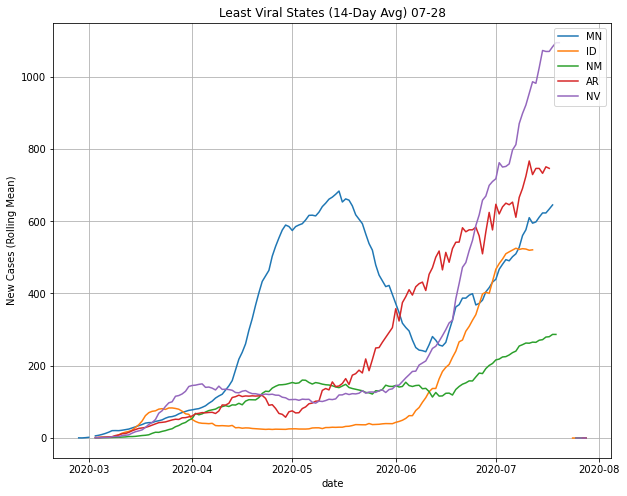

<IPython.core.display.Javascript object>

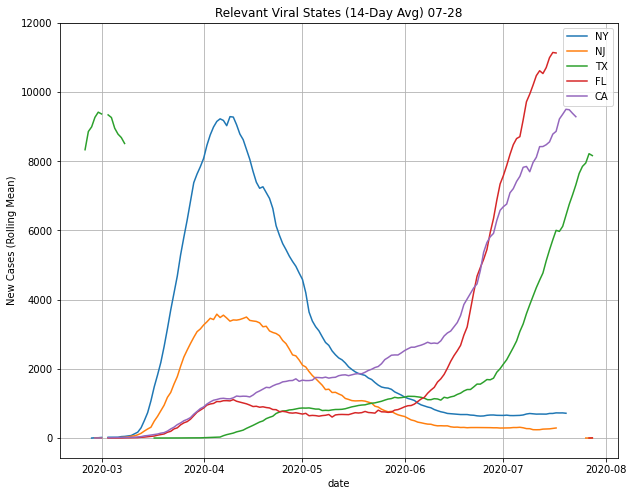

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,,


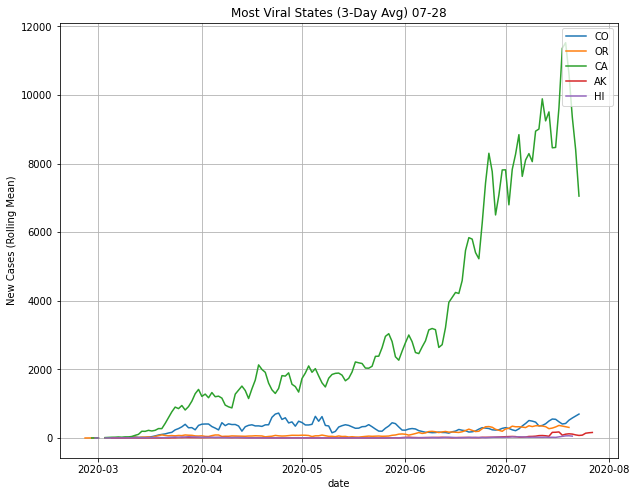

<IPython.core.display.Javascript object>

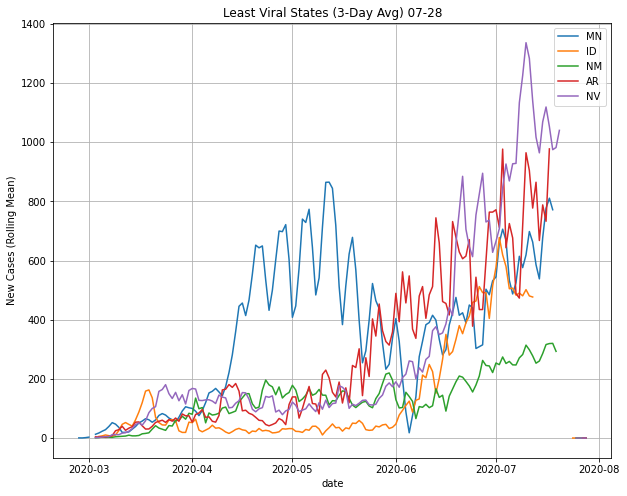

<IPython.core.display.Javascript object>

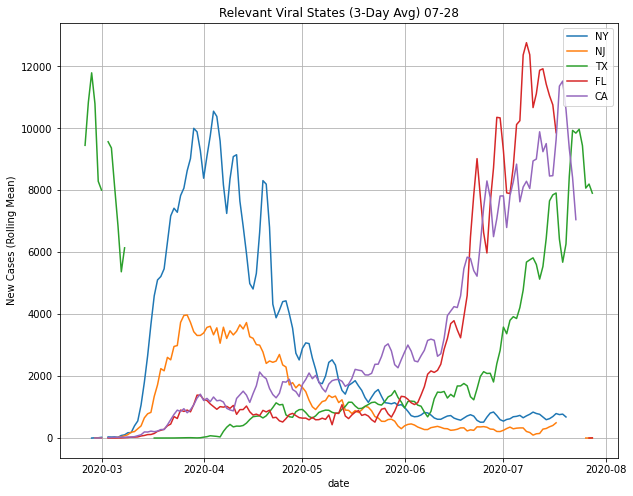

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,,


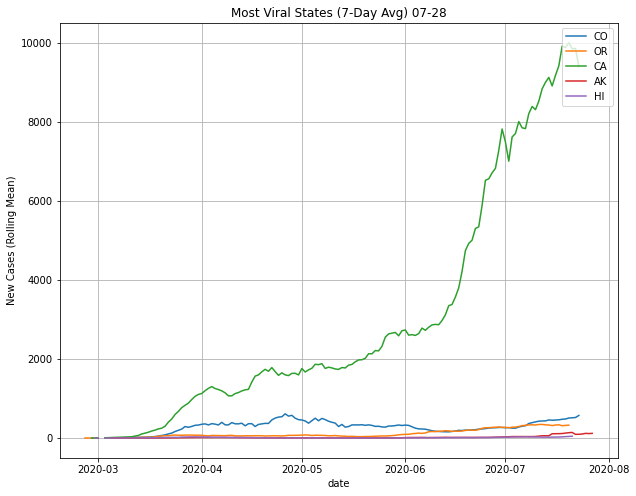

<IPython.core.display.Javascript object>

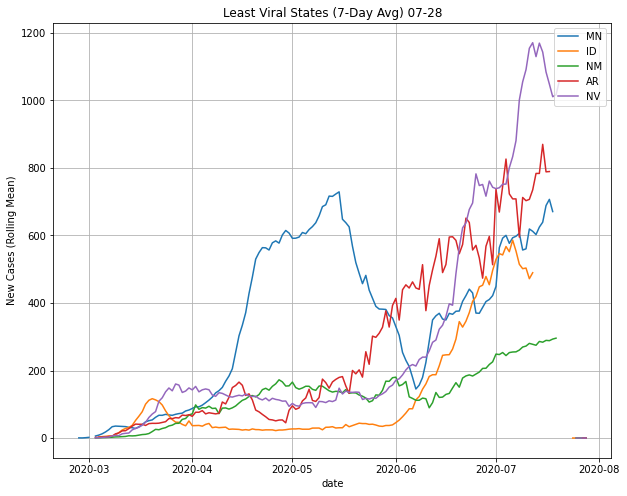

<IPython.core.display.Javascript object>

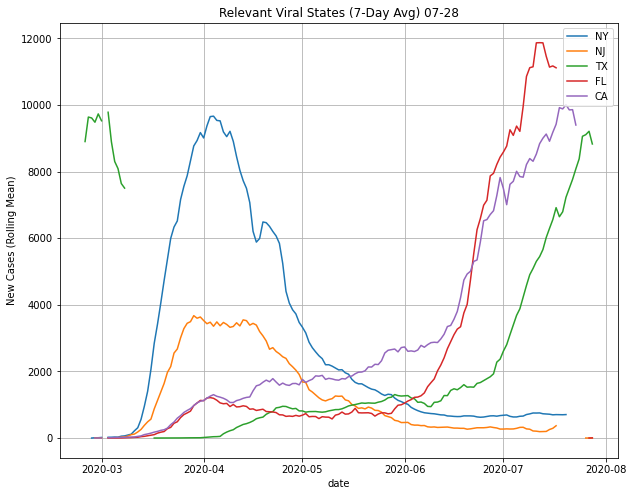

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Show Time Series (Most & Least Viral) that plots 
# 14,7,3-Day Average along with Current in separate Tabs 
DAY_TABS = { 1: 'Current', 14: '14-Day Avg', 3: '3-Day Avg', 7: '7-Day Avg' }
tb = widgets.TabBar(list(DAY_TABS.values()), location='bottom')

for days in DAY_TABS.keys():
  with tb.output_to(DAY_TABS[days]):

    df_ML_SMA = rolling_mean2(df, days, 'date', 'region', 'new_cases', 'rolling_mean')
    # df_ML_SMA = rolling_mean(df, days, 'mean')
    df_ML_SMA_current = df_ML_SMA.groupby('region').tail(1)

    sorted_df_ML_SMA = df_ML_SMA_current.sort_values(by=['rolling_mean'])
    sorted_states = sorted_df_ML_SMA['region']

    grid = widgets.Grid(1, 3)
    with grid.output_to(0,0):
      grid.clear_cell()
      plot_timeseries_rollingmean(df_ML_SMA, sorted_states.tail(GROUP_SIZE), 'Most Viral States (' + DAY_TABS[days] + ') ' + date[-5:])
    with grid.output_to(0,1):
      grid.clear_cell()
      plot_timeseries_rollingmean(df_ML_SMA, sorted_states.head(GROUP_SIZE), 'Least Viral States (' + DAY_TABS[days] + ') ' + date[-5:])
    with grid.output_to(0,2):
      grid.clear_cell()
      plot_timeseries_rollingmean(df_ML_SMA, ['NY','NJ', 'TX', 'FL','CA'], 'Relevant Viral States (' + DAY_TABS[days] + ') ' + date[-5:])


# Plot 7-day Average of R-value for every region 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

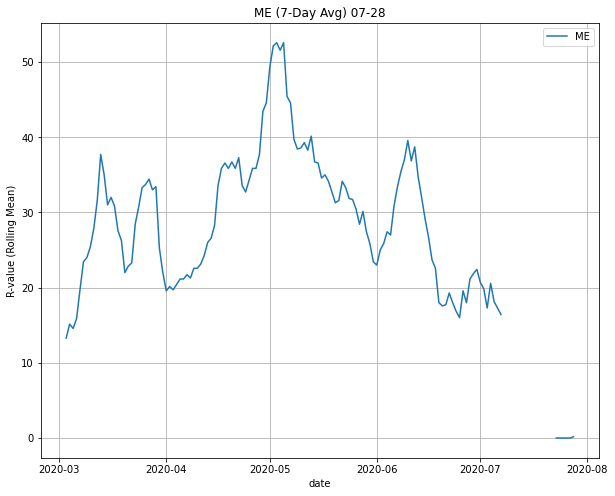

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

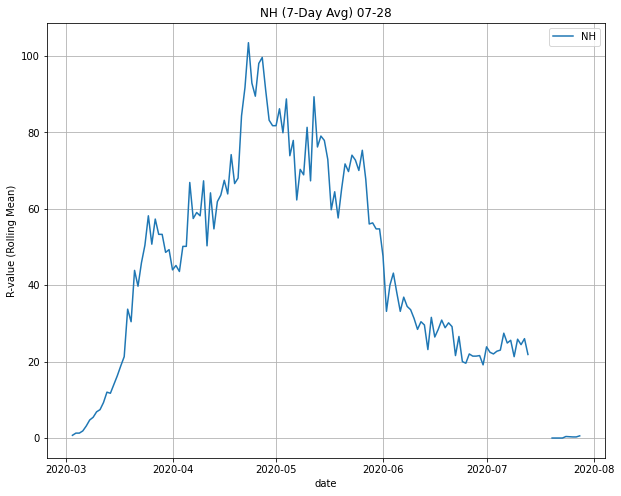

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

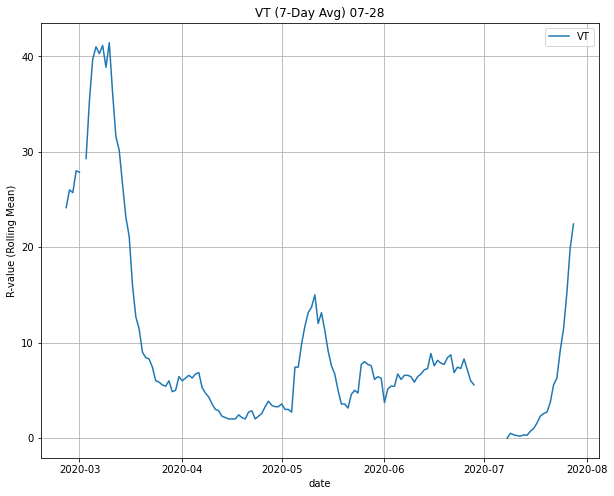

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

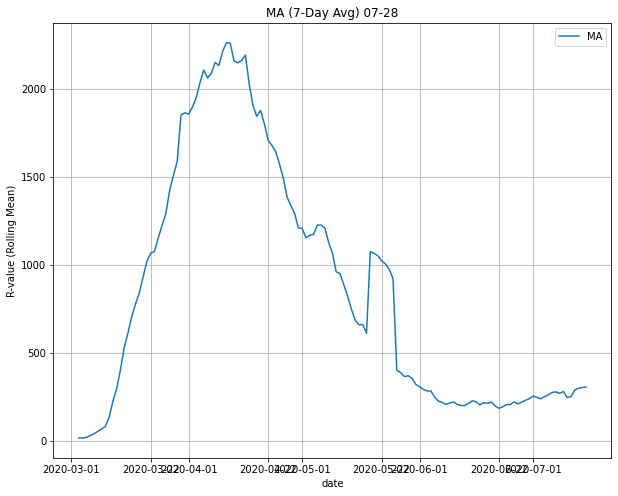

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

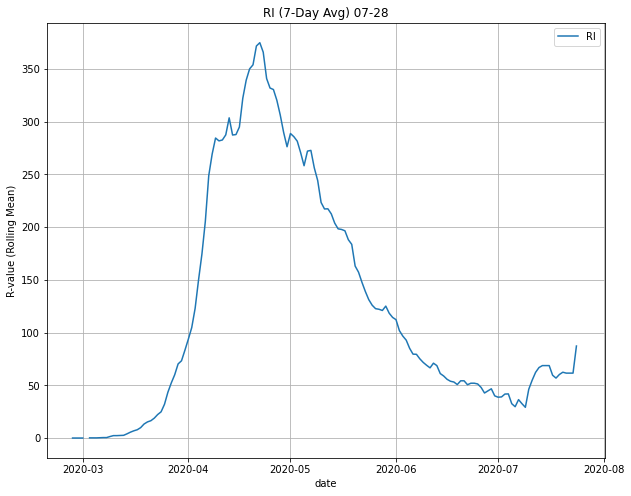

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

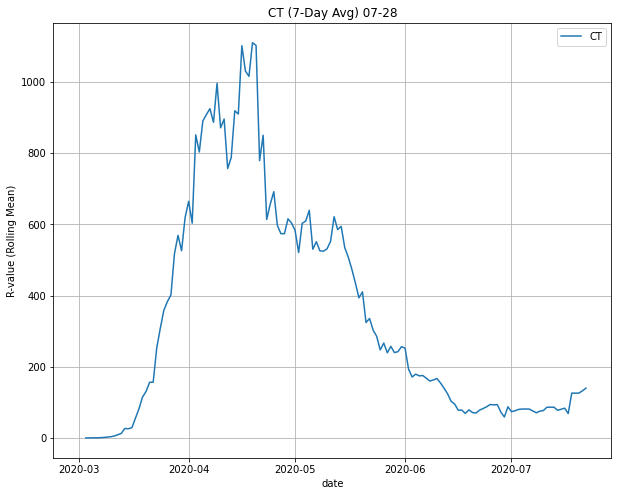

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

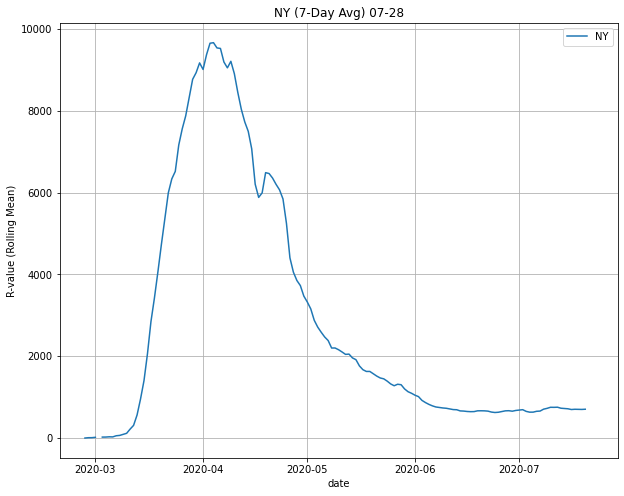

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

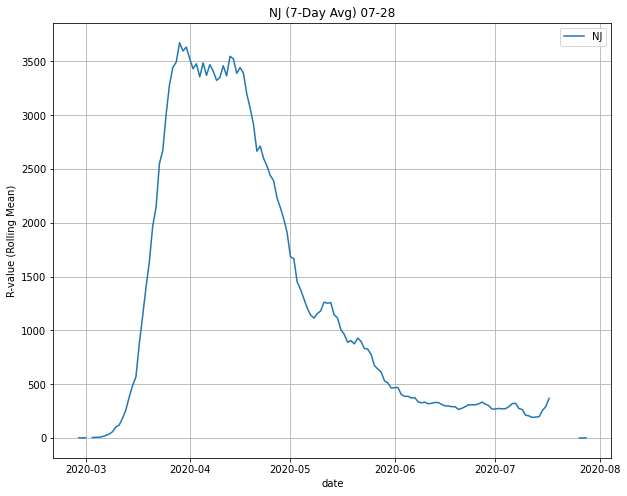

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

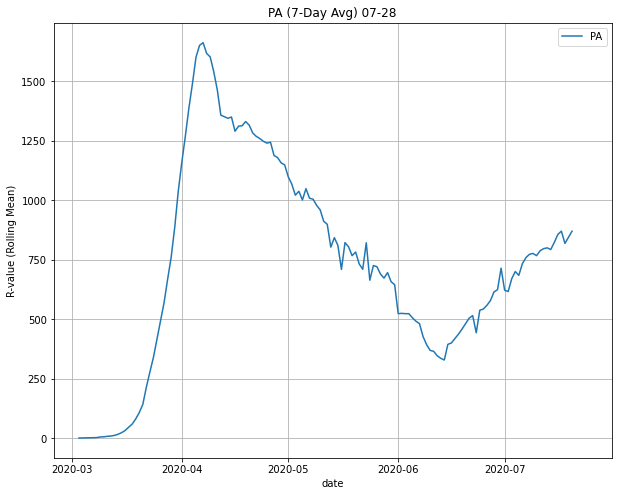

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

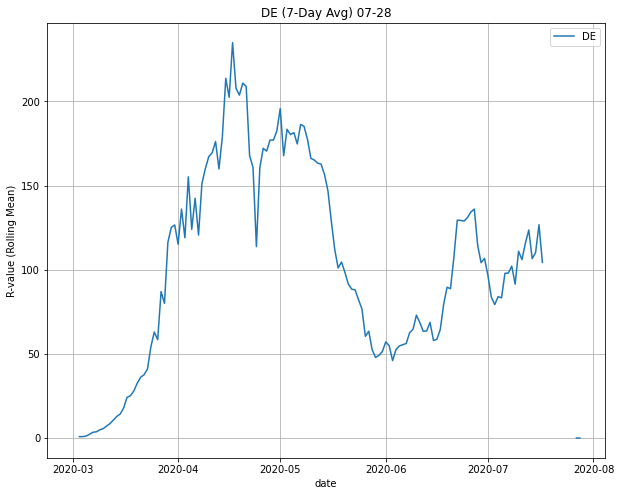

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

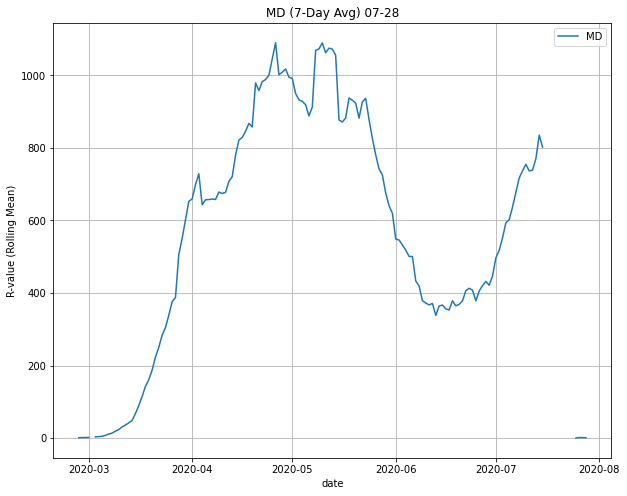

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

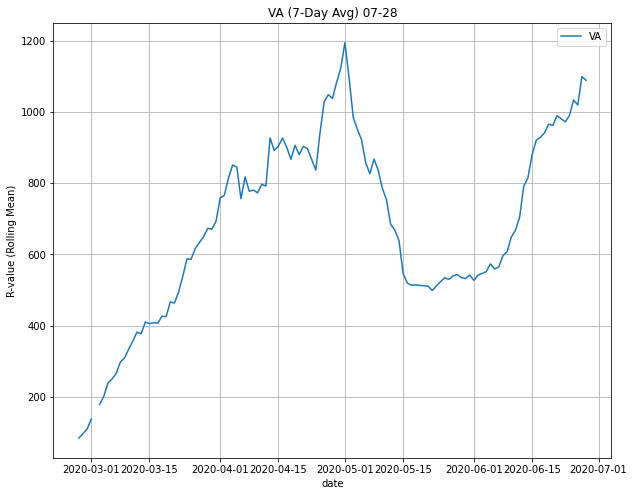

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

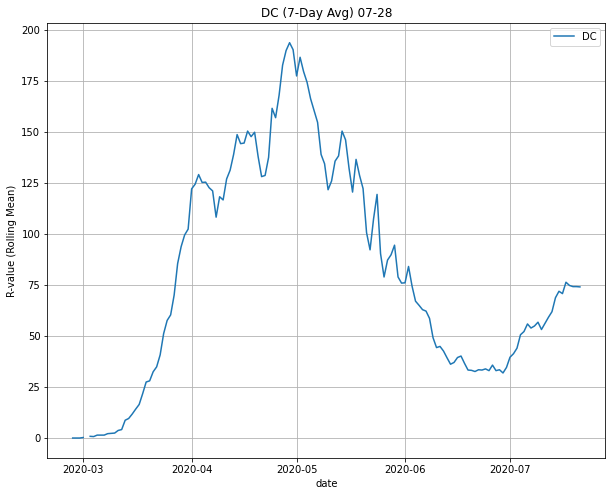

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

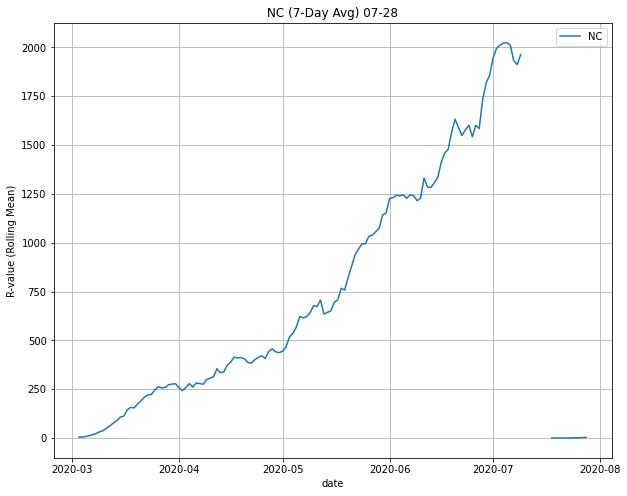

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

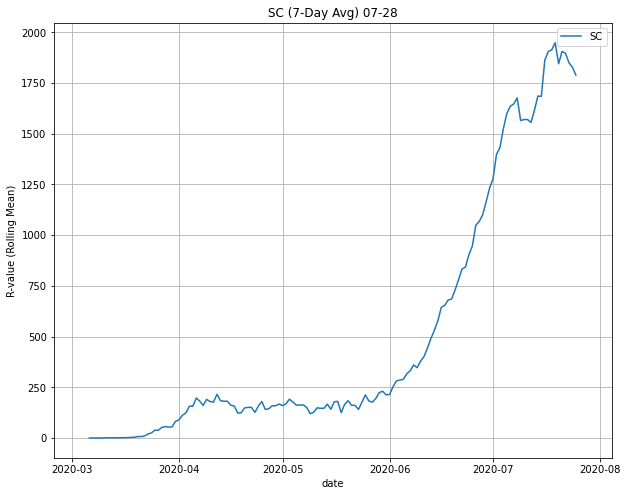

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

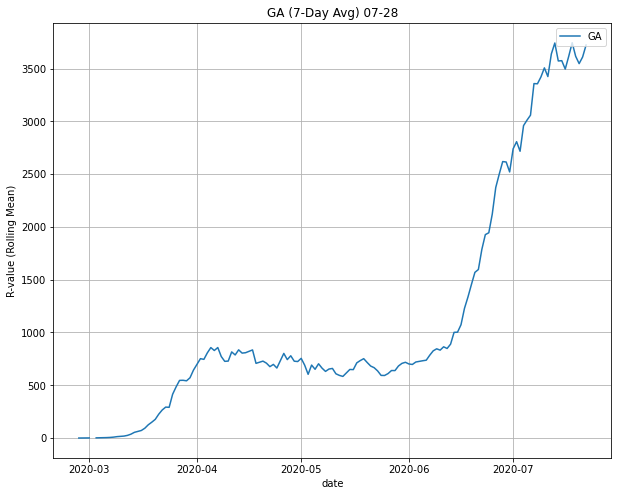

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

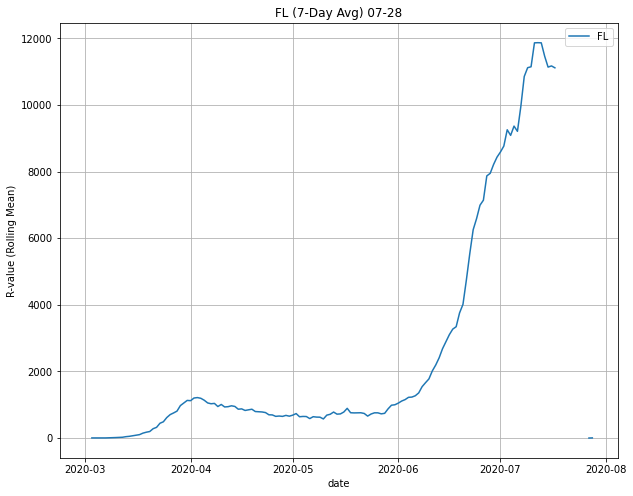

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

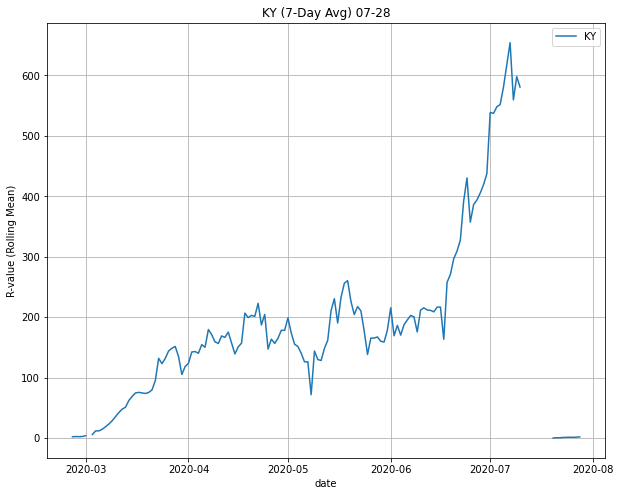

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

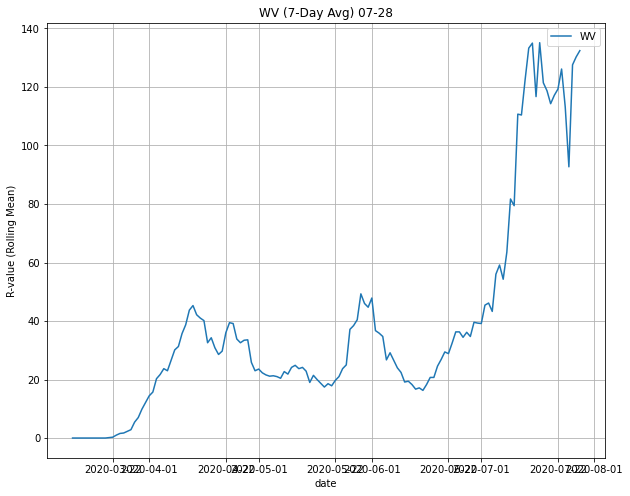

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

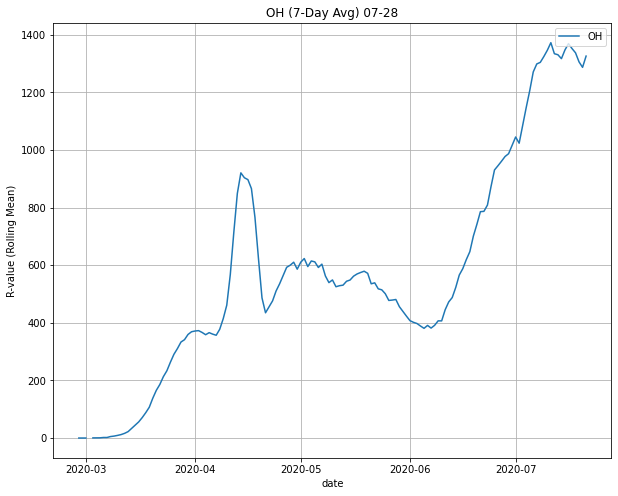

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

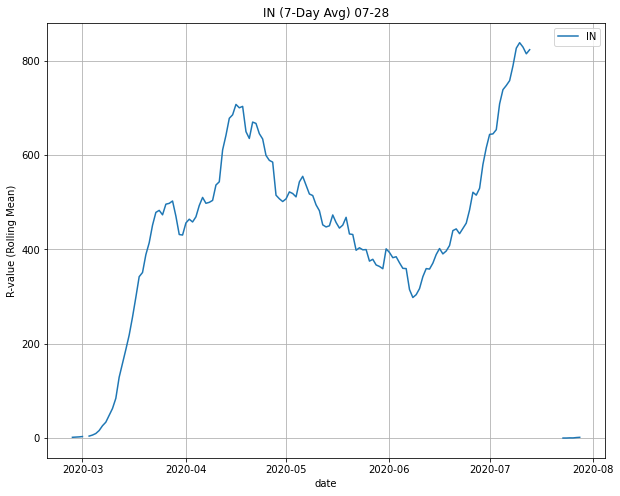

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

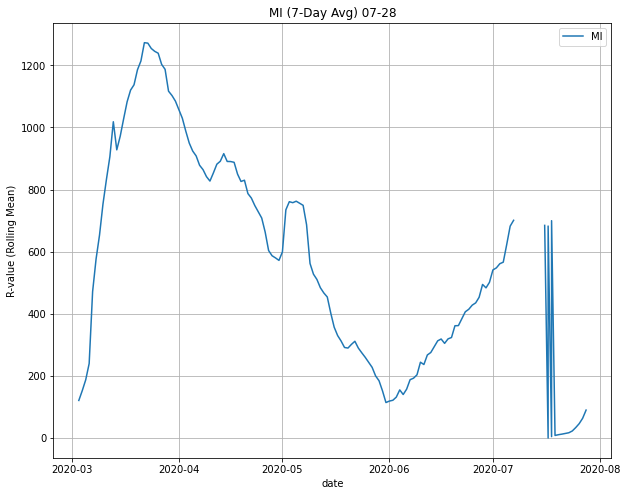

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

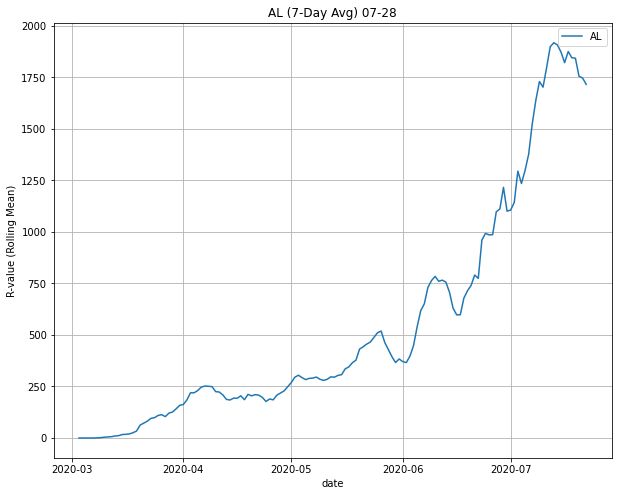

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

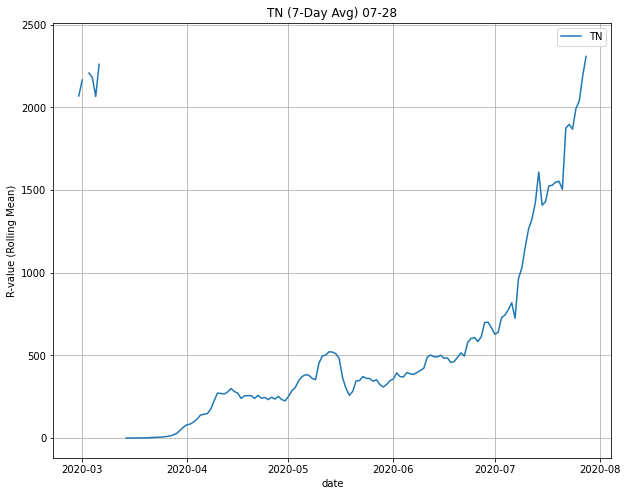

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

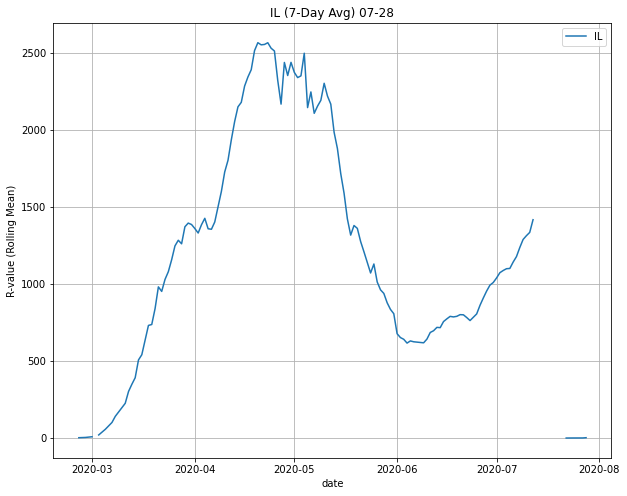

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

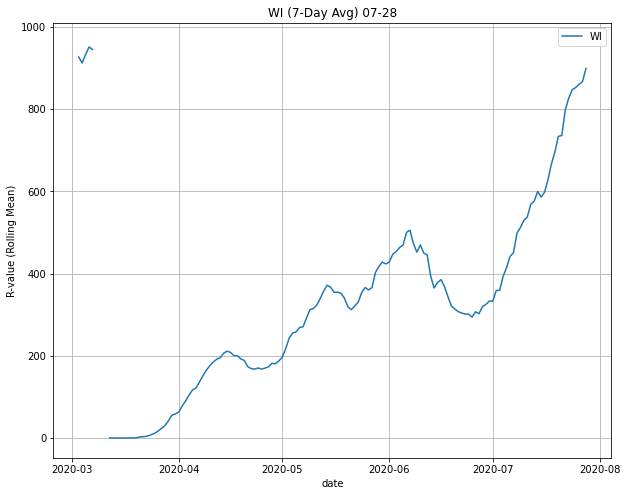

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

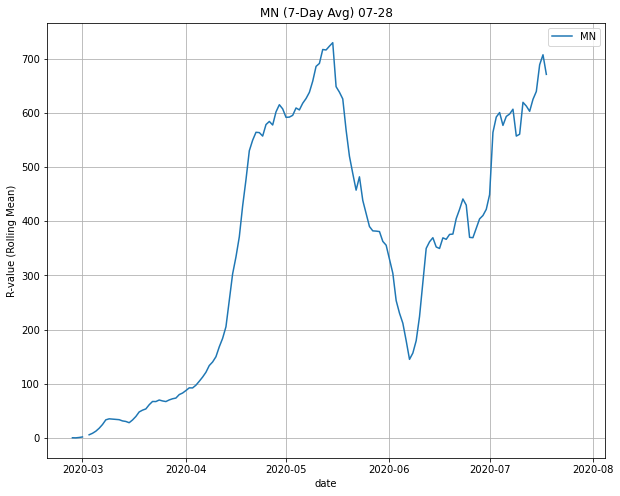

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

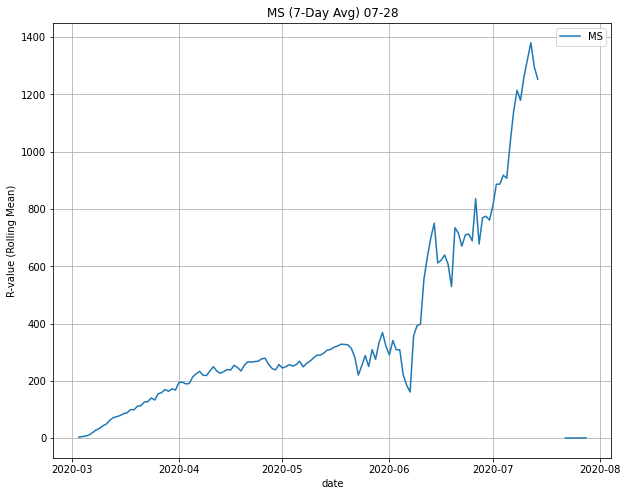

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

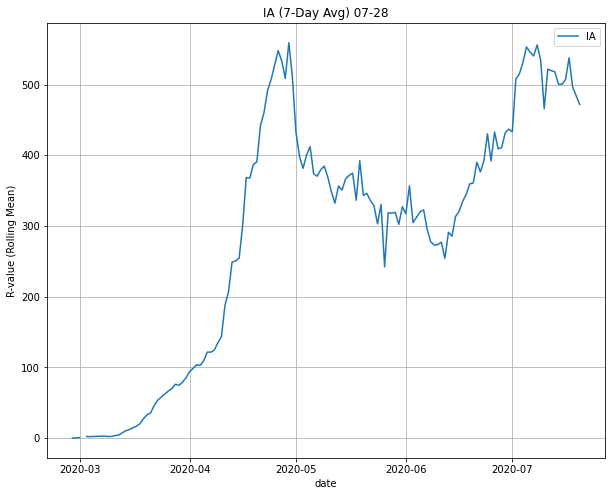

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

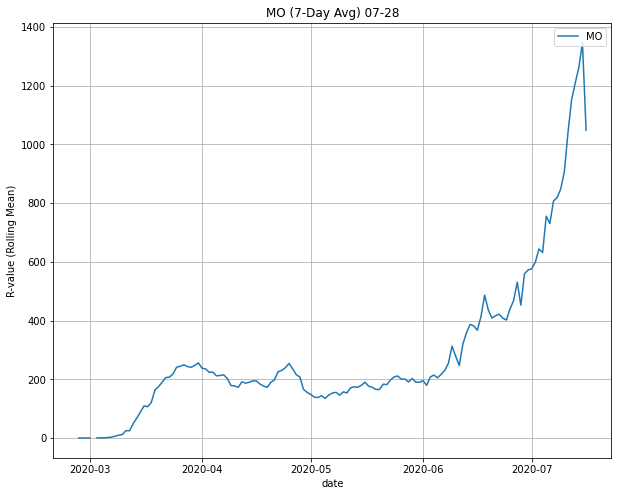

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

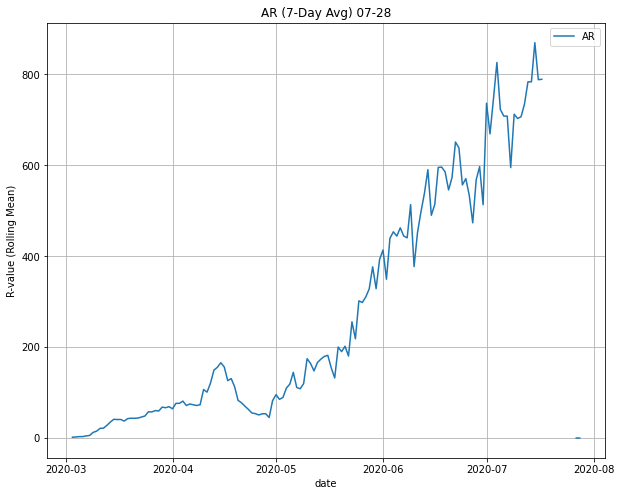

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

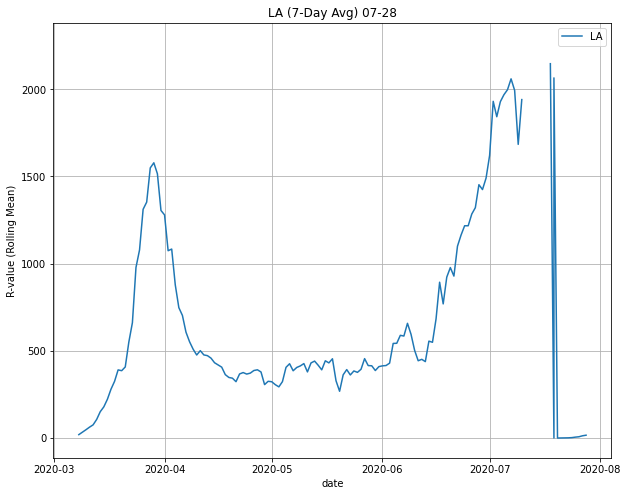

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

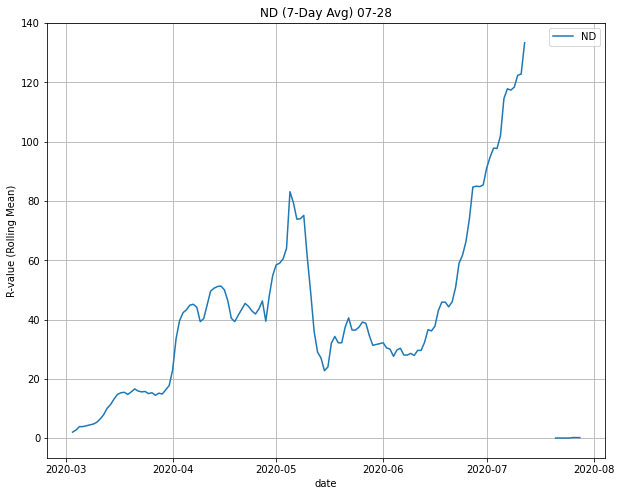

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

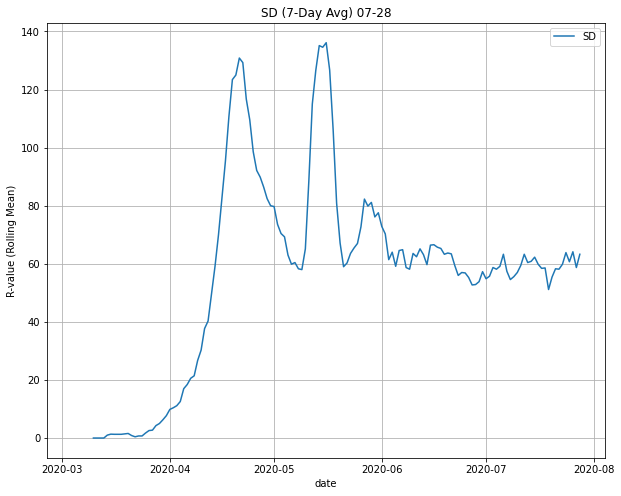

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

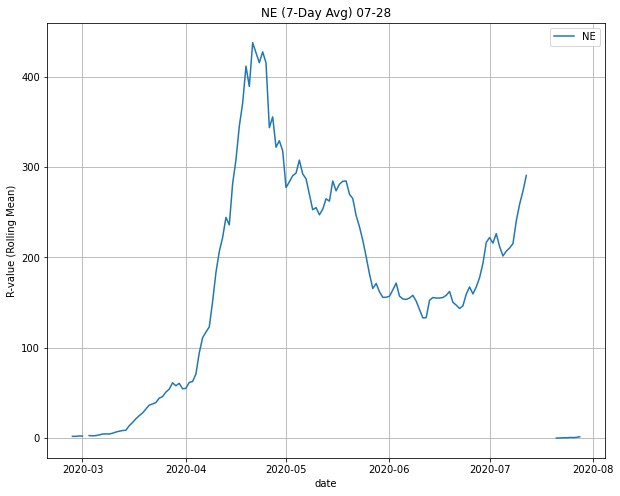

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

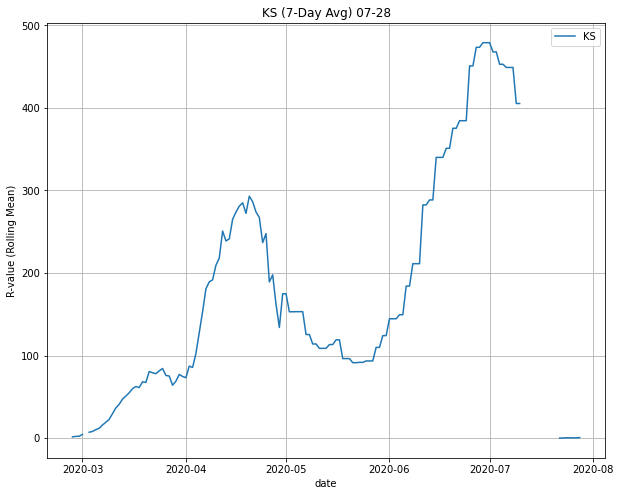

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

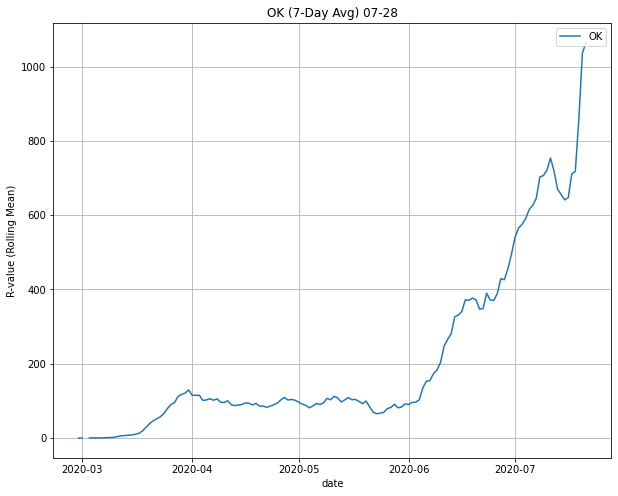

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

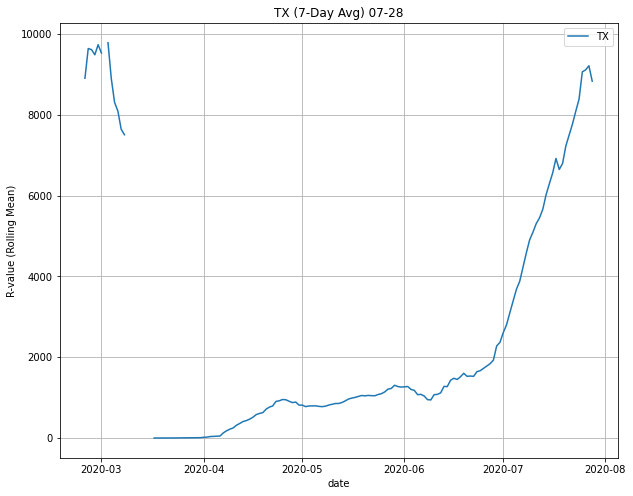

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

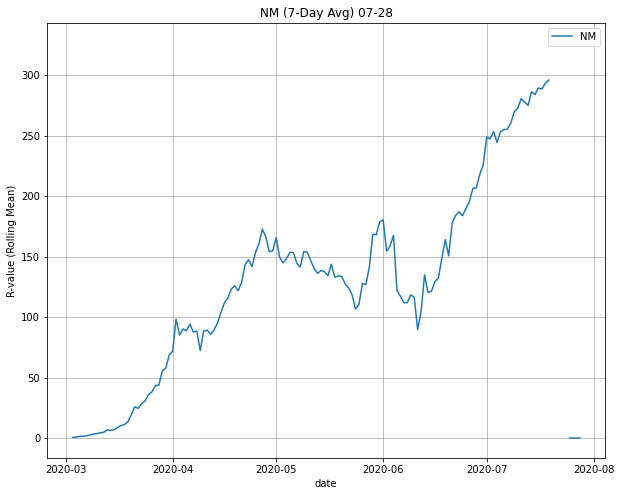

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

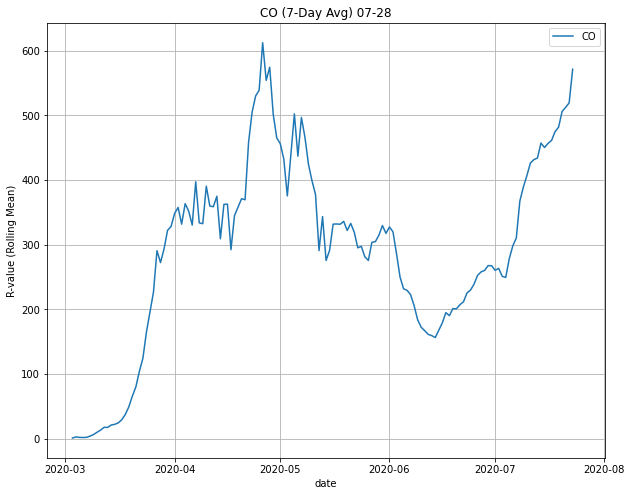

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

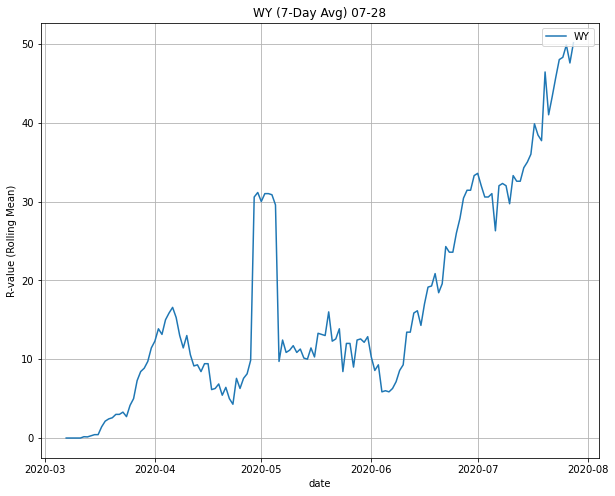

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

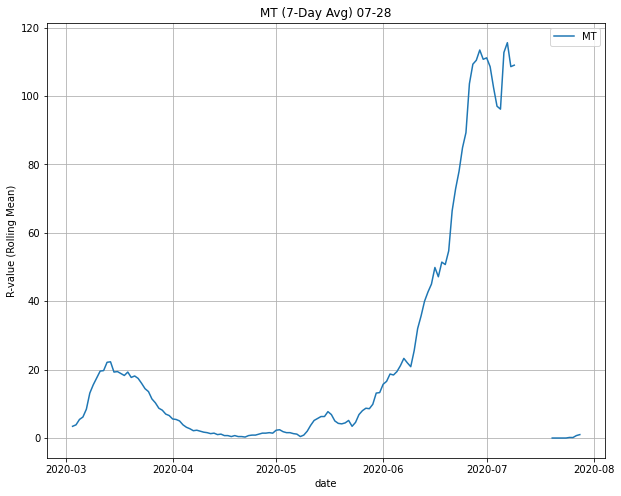

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

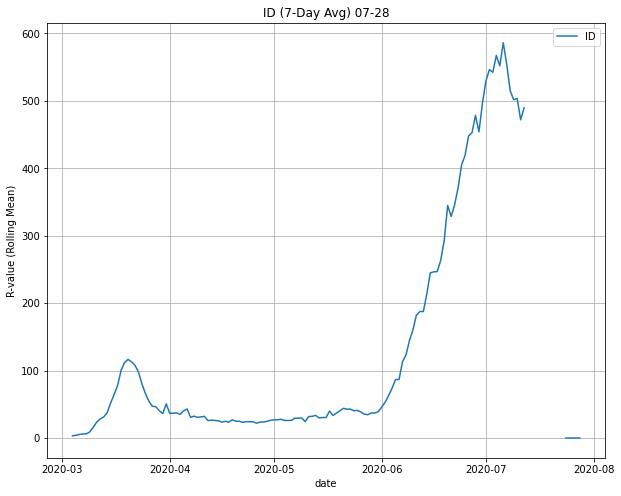

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

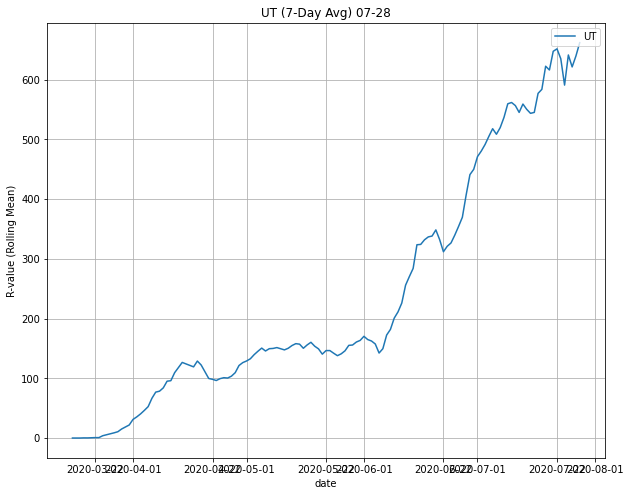

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

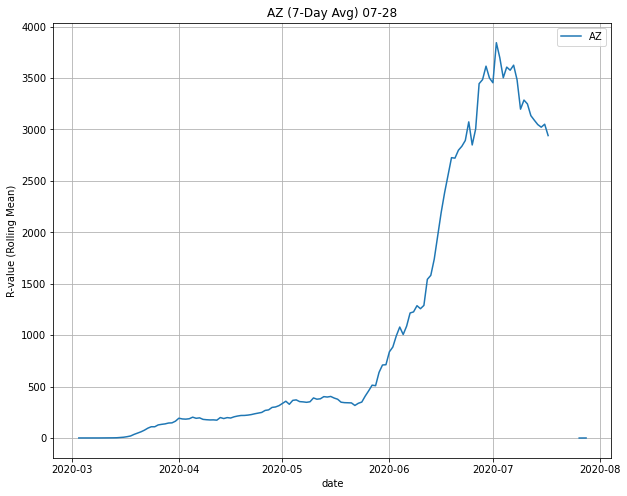

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

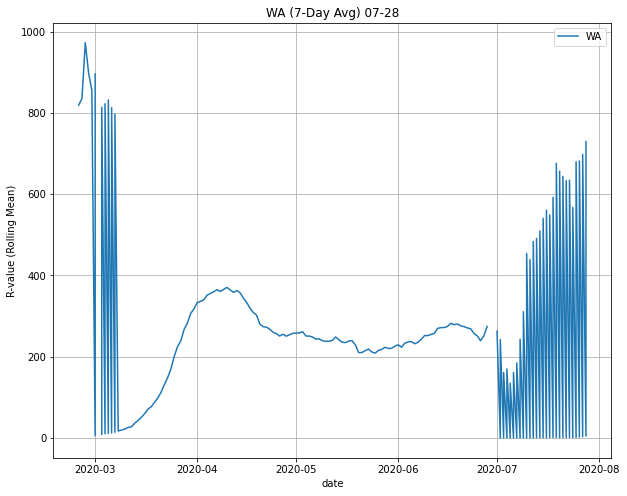

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

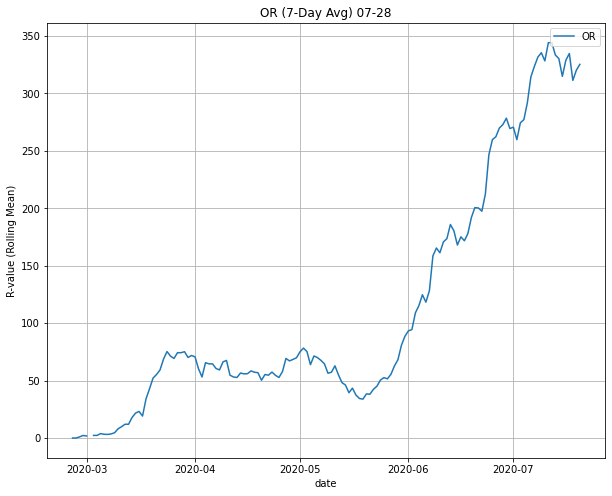

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

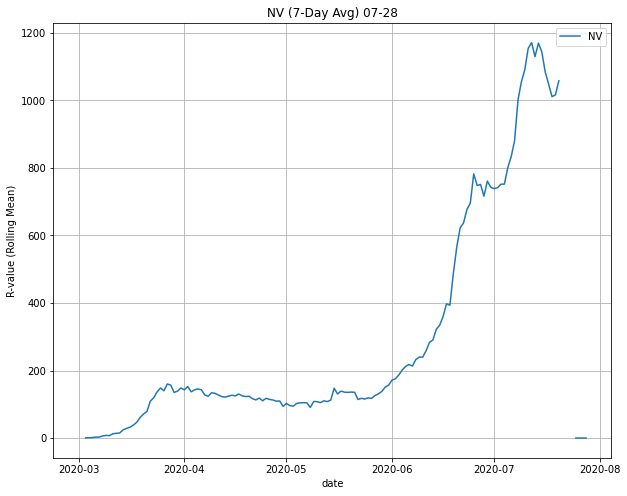

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

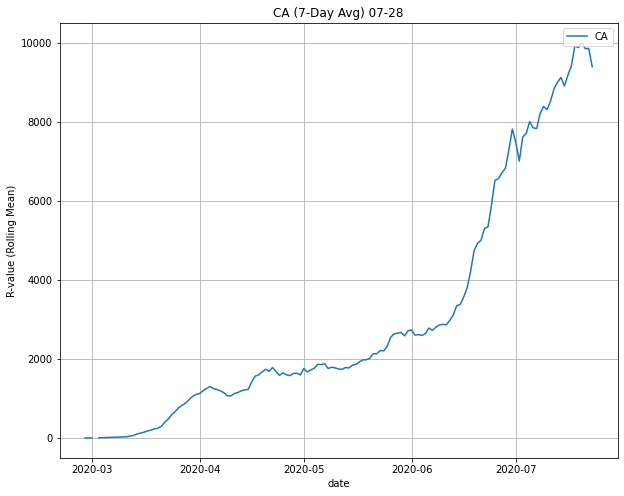

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

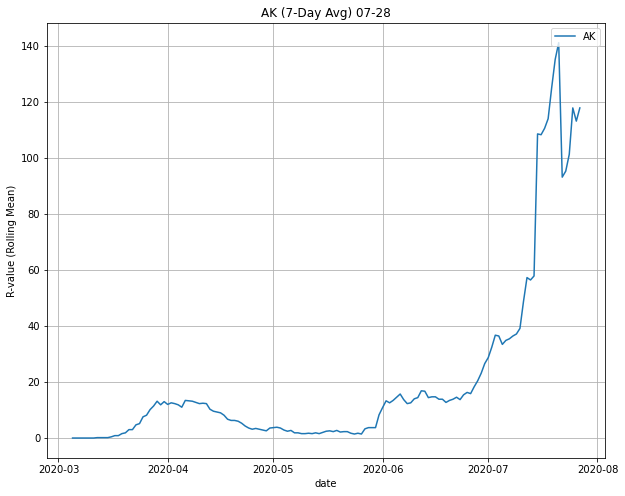

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

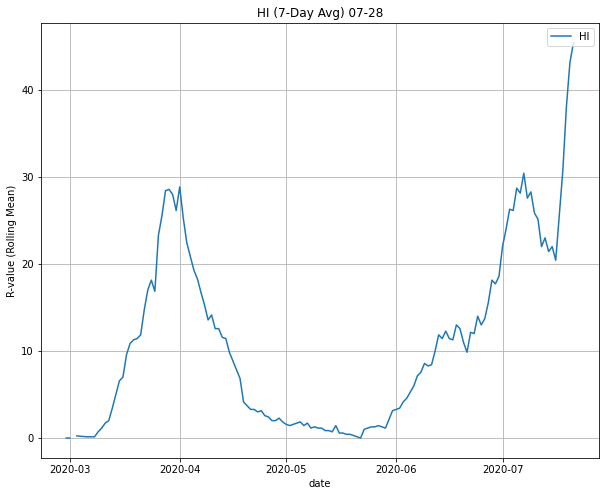

<IPython.core.display.Javascript object>

In [27]:
# Show Time Series (Every State) that plots 
# 7-Day Average in separate Tabs 
# df_ML_SMA = rolling_mean(df, 7, 'mean')
df_ML_SMA = rolling_mean2(df, days, 'date', 'region', 'new_cases', 'rolling_mean')

tb = widgets.TabBar(states.tolist(), location='top')
for state in states:
  with tb.output_to(state):
    plot_timeseries_rollingmean(df_ML_SMA, [state], state+' (7-Day Avg) '+ date[-5:])

